# **Brain Tumor Evaluation - binary classification**
### **Abdallah Fekry**
**Model 9**

---

class 0 = No tumor

class 1 = Tumor

Getting Datasets

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [2]:
!kaggle datasets download -d bebofekry/brain-tumor-or-no
!unzip brain-tumor-or-no.zip -d brain-tumor-or-no

 86% 23.0M/26.7M [00:00<00:00, 50.3MB/s]
100% 26.7M/26.7M [00:00<00:00, 50.1MB/s]
Archive:  brain-tumor-or-no.zip
  inflating: brain-tumor-or-no/Brain Tumor or no me/Test/no_tumor/image(1).jpg  
  inflating: brain-tumor-or-no/Brain Tumor or no me/Test/no_tumor/image(10).jpg  
  inflating: brain-tumor-or-no/Brain Tumor or no me/Test/no_tumor/image(100).jpg  
  inflating: brain-tumor-or-no/Brain Tumor or no me/Test/no_tumor/image(101).jpg  
  inflating: brain-tumor-or-no/Brain Tumor or no me/Test/no_tumor/image(102).jpg  
  inflating: brain-tumor-or-no/Brain Tumor or no me/Test/no_tumor/image(103).jpg  
  inflating: brain-tumor-or-no/Brain Tumor or no me/Test/no_tumor/image(104).jpg  
  inflating: brain-tumor-or-no/Brain Tumor or no me/Test/no_tumor/image(11).jpg  
  inflating: brain-tumor-or-no/Brain Tumor or no me/Test/no_tumor/image(12).jpg  
  inflating: brain-tumor-or-no/Brain Tumor or no me/Test/no_tumor/image(13).jpg  
  inflating: brain-tumor-or-no/Brain Tumor or no me/Test/no_tu

In [3]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection
!unzip brain-mri-images-for-brain-tumor-detection.zip -d brain-mri-images-for-brain-tumor-detection

 33% 5.00M/15.1M [00:00<00:00, 45.5MB/s]
100% 15.1M/15.1M [00:00<00:00, 100MB/s] 
Archive:  brain-mri-images-for-brain-tumor-detection.zip
  inflating: brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/10 no.jpg  
  inflating: brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/11 no.jpg  
  inflating: brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/12 no.jpg  
  inflating: brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/13 no.jpg  
  inflating: brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/14 no.jpg  
  inflating: brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/15 no.jpg  
  inflating: brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/17 no.jpg  
  inflating: brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/18 no.jpg  
  inflating: brain-mri-images-for-brain-tu

In [4]:
classes = {0 : 'No tumor',
           1 : 'Tumor'}

importing libraries

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import vgg16
from keras.src.layers.pooling.average_pooling2d import AvgPool2D
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential
from keras.layers import Dense,Input,Flatten
from tensorflow.keras.utils import load_img,img_to_array
from sklearn.metrics import confusion_matrix

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory('/content/brain-tumor-or-no/Brain Tumor or no me/Train',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=True)
test_data = train_datagen.flow_from_directory('/content/brain-tumor-or-no/Brain Tumor or no me/Test',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='binary',
                                              shuffle=False)

Found 781 images belonging to 2 classes.
Found 208 images belonging to 2 classes.


In [7]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

train_data2 = train_datagen.flow_from_directory('/content/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=True,
                                               subset='training')
test_data2 = train_datagen.flow_from_directory('/content/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='binary',
                                              shuffle=False,
                                              subset='validation')

Found 229 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


In [8]:
train_data.image_shape

(224, 224, 3)

In [9]:
train_data2.image_shape

(224, 224, 3)

In [10]:
train_data.class_indices

{'no_tumor': 0, 'tumor': 1}

In [11]:
train_data2.class_indices

{'no': 0, 'yes': 1}

In [12]:
np.unique(test_data.labels)

array([0, 1], dtype=int32)

In [13]:
np.unique(test_data2.labels)

array([0, 1], dtype=int32)

In [14]:
vgg16_model = vgg16.VGG16(include_top=False, input_shape=(224,224,3))
vgg16_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [15]:
for layer in vgg16_model.layers[:]:
  layer.trainable = False
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
model = Sequential()
model.add(vgg16_model)
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 4096)              102764544 
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 4097      
                                                                 
Total params: 134264641 (512.18 MB)
Trainable params: 11

In [17]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)

Training on first dataset

In [34]:
model.compile(loss='binary_crossentropy',optimizer=opt ,metrics=['accuracy','Recall'])
from tensorflow.keras.callbacks import EarlyStopping
results = model.fit(train_data, epochs=100, validation_data=test_data,
                  steps_per_epoch=len(train_data), validation_steps=len(test_data),
                  callbacks = EarlyStopping(patience=5 ,monitor='val_accuracy',restore_best_weights=True)
                  )

Epoch 1/100
25/25 [==============================] - 7s 257ms/step - loss: 0.3119 - accuracy: 0.9168 - recall: 0.9326 - val_loss: 2.3330 - val_accuracy: 0.7019 - val_recall: 0.4175
Epoch 2/100
25/25 [==============================] - 5s 217ms/step - loss: 0.0128 - accuracy: 0.9949 - recall: 0.9974 - val_loss: 2.4282 - val_accuracy: 0.7260 - val_recall: 0.4466
Epoch 3/100
25/25 [==============================] - 5s 203ms/step - loss: 0.0143 - accuracy: 0.9949 - recall: 0.9948 - val_loss: 3.0467 - val_accuracy: 0.6442 - val_recall: 0.2816
Epoch 4/100
25/25 [==============================] - 5s 215ms/step - loss: 0.0085 - accuracy: 0.9974 - recall: 0.9974 - val_loss: 8.0310 - val_accuracy: 0.5385 - val_recall: 0.0680
Epoch 5/100
25/25 [==============================] - 5s 205ms/step - loss: 0.0062 - accuracy: 0.9987 - recall: 1.0000 - val_loss: 2.9248 - val_accuracy: 0.6683 - val_recall: 0.3301
Epoch 6/100
25/25 [==============================] - 5s 213ms/step - loss: 0.0038 - accuracy: 0

In [65]:
loss , acc, recall = model.evaluate(test_data)

7/7 [==============================] - 1s 124ms/step - loss: 0.8539 - accuracy: 0.7548 - recall: 0.9709


In [67]:
print('Test accuracy = ',round(acc*100,2),'%\nLoss = ',loss ,'\nRecall = ',round(recall*100,2),'%',sep='')

Test accuracy = 75.48%
Loss = 0.8539482951164246
Recall = 97.09%


Training on second dataset

In [39]:
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001) ,metrics=['accuracy','Recall'])
from tensorflow.keras.callbacks import EarlyStopping
results = model.fit(train_data2, epochs=100, validation_data=test_data2,
                  steps_per_epoch=len(train_data2), validation_steps=len(test_data2),
                  callbacks = EarlyStopping(patience=5 ,monitor='val_accuracy',restore_best_weights=True)
                  )

Epoch 1/100
8/8 [==============================] - 5s 439ms/step - loss: 2.2885 - accuracy: 0.6332 - recall: 0.8214 - val_loss: 0.4379 - val_accuracy: 0.7917 - val_recall: 0.6667
Epoch 2/100
8/8 [==============================] - 2s 254ms/step - loss: 0.4567 - accuracy: 0.7904 - recall: 0.6714 - val_loss: 0.3674 - val_accuracy: 0.8333 - val_recall: 1.0000
Epoch 3/100
8/8 [==============================] - 2s 251ms/step - loss: 0.2597 - accuracy: 0.8646 - recall: 1.0000 - val_loss: 0.2887 - val_accuracy: 0.8750 - val_recall: 0.8667
Epoch 4/100
8/8 [==============================] - 2s 255ms/step - loss: 0.1404 - accuracy: 0.9694 - recall: 0.9500 - val_loss: 0.2884 - val_accuracy: 0.9167 - val_recall: 1.0000
Epoch 5/100
8/8 [==============================] - 1s 187ms/step - loss: 0.1078 - accuracy: 0.9607 - recall: 0.9929 - val_loss: 0.2359 - val_accuracy: 0.9167 - val_recall: 0.9333
Epoch 6/100
8/8 [==============================] - 2s 257ms/step - loss: 0.0493 - accuracy: 0.9825 - reca

In [70]:
loss , acc, recall = model.evaluate(test_data)

7/7 [==============================] - 1s 119ms/step - loss: 0.8539 - accuracy: 0.7548 - recall: 0.9709


In [71]:
print('Test accuracy = ',round(acc*100,2),'%\nLoss = ',loss ,'\nRecall = ',round(recall*100,2),'%',sep='')

Test accuracy = 75.48%
Loss = 0.8539482951164246
Recall = 97.09%


In [72]:
loss2 , acc2, recall2 = model.evaluate(test_data2)

1/1 [==============================] - 0s 240ms/step - loss: 0.2198 - accuracy: 0.9583 - recall: 1.0000


In [73]:
print('Test accuracy = ',round(acc2*100,2),'%\nLoss = ',loss2 ,'\nRecall = ',round(recall2*100,2),'%',sep='')

Test accuracy = 95.83%
Loss = 0.21979083120822906
Recall = 100.0%


Tumor Sample


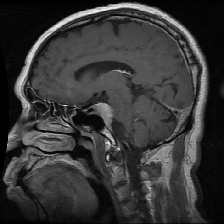

In [77]:
print("Tumor Sample")
t = load_img('/content/brain-tumor-or-no/Brain Tumor or no me/Test/tumor/image(1).jpg',target_size=(224,224))
# plt.imshow()
t

No tumor Sample


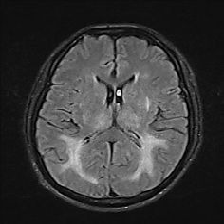

In [78]:
print('No tumor Sample')
n = load_img('/content/brain-tumor-or-no/Brain Tumor or no me/Test/no_tumor/image(10).jpg',target_size=(224,224))
# plt.imshow(img_normal)
n

Text(0.5, 1.0, 'No tumor')

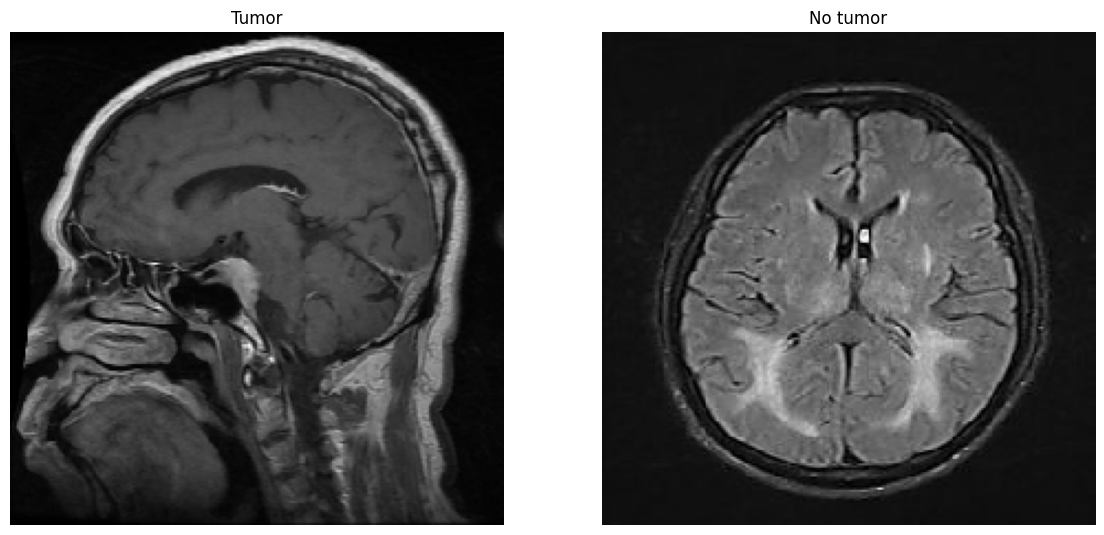

In [79]:
fig = plt.figure(figsize=(14,7))
# plt.grid=False
fig.add_subplot(1, 2, 1)
plt.axis('off')
plt.imshow(t)
plt.title('Tumor')
fig.add_subplot(1, 2, 2)
plt.axis('off')
plt.imshow(n)
plt.title('No tumor')

In [80]:
t = img_to_array(t)
n = img_to_array(n)
t = t/255
n = n/255
t = t.reshape(1,224,224,3)
n = n.reshape(1,224,224,3)
n.shape

(1, 224, 224, 3)

In [83]:
p1 = (model.predict(t)>=0.5).astype(int)[0,0]

print("Class ",p1,": ",classes[p1],sep='')

1/1 [==============================] - 0s 49ms/step
Class 1: Tumor


In [84]:
p2 = (model.predict(n)>=0.5).astype(int)[0,0]

print("Class ",p2,": ",classes[p2],sep='')

1/1 [==============================] - 0s 43ms/step
Class 0: No tumor


Tumor Sample


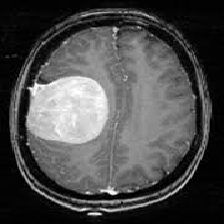

In [85]:
print("Tumor Sample")
t = load_img('/content/brain-mri-images-for-brain-tumor-detection/yes/Y1.jpg',target_size=(224,224))
# plt.imshow()
t

No tumor Sample


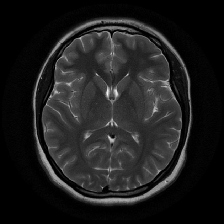

In [86]:
print('No tumor Sample')
n = load_img('/content/brain-mri-images-for-brain-tumor-detection/no/1 no.jpeg',target_size=(224,224))
# plt.imshow(img_normal)
n

Text(0.5, 1.0, 'No tumor')

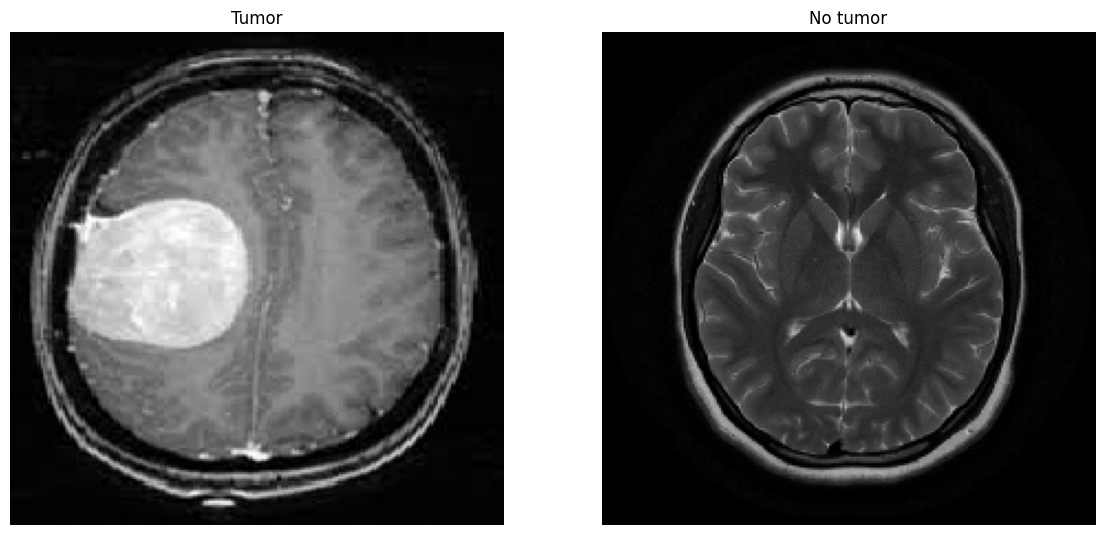

In [87]:
fig = plt.figure(figsize=(14,7))
# plt.grid=False
fig.add_subplot(1, 2, 1)
plt.axis('off')
plt.imshow(t)
plt.title('Tumor')
fig.add_subplot(1, 2, 2)
plt.axis('off')
plt.imshow(n)
plt.title('No tumor')

In [88]:
t = img_to_array(t)
n = img_to_array(n)
t = t/255
n = n/255
t = t.reshape(1,224,224,3)
n = n.reshape(1,224,224,3)
n.shape

(1, 224, 224, 3)

In [89]:
p1 = (model.predict(t)>=0.5).astype(int)[0,0]

print("Class ",p1,": ",classes[p1],sep='')

1/1 [==============================] - 0s 20ms/step
Class 1: Tumor


In [90]:
p2 = (model.predict(n)>=0.5).astype(int)[0,0]

print("Class ",p2,": ",classes[p2],sep='')

1/1 [==============================] - 0s 20ms/step
Class 0: No tumor


---

In [91]:
yp = (model.predict(test_data)>=0.5).astype(int)
yp.shape

7/7 [==============================] - 1s 150ms/step


(208, 1)

In [92]:
yp = yp.reshape(-1,)
yp

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [93]:
yp2 = (model.predict(test_data2)>=0.5).astype(int)
yp2 = yp2.reshape(-1,)
yp2.shape

1/1 [==============================] - 0s 82ms/step


(24,)

In [61]:
df = pd.DataFrame({'filename':test_data.filenames,'y_actual':test_data.classes,'Y_pred':yp})
df

,filename,y_actual,Y_pred
0,no_tumor/image(1).jpg,0,1
1,no_tumor/image(10).jpg,0,0
2,no_tumor/image(100).jpg,0,0
3,no_tumor/image(101).jpg,0,0
4,no_tumor/image(102).jpg,0,1
...,...,...,...
203,tumor/image(96).jpg,1,1
204,tumor/image(97).jpg,1,1
205,tumor/image(98).jpg,1,1
206,tumor/image(99).jpg,1,0


In [62]:
test_data.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [94]:
m = confusion_matrix(test_data.labels,yp)
m

array([[ 57,  48],
       [  3, 100]])

In [95]:
m2 = confusion_matrix(test_data2.labels,yp2)
m2

array([[ 8,  1],
       [ 0, 15]])

 -> On First Dataset

Heatmap



<Axes: xlabel='Predicted', ylabel='Actual'>

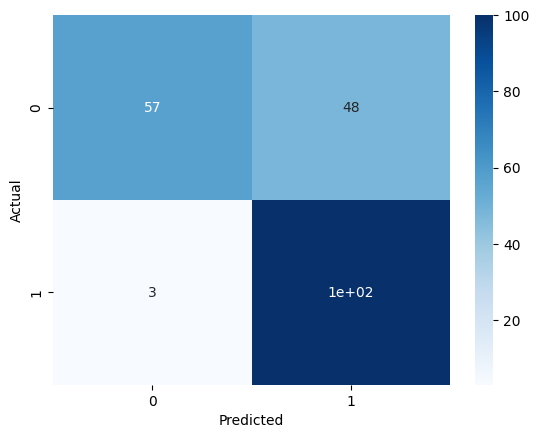

In [96]:
print("Heatmap\n")
m = pd.crosstab(test_data.labels, yp, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(m,annot=True, cmap='Blues')

 -> On Second Dataset

Heatmap



<Axes: xlabel='Predicted', ylabel='Actual'>

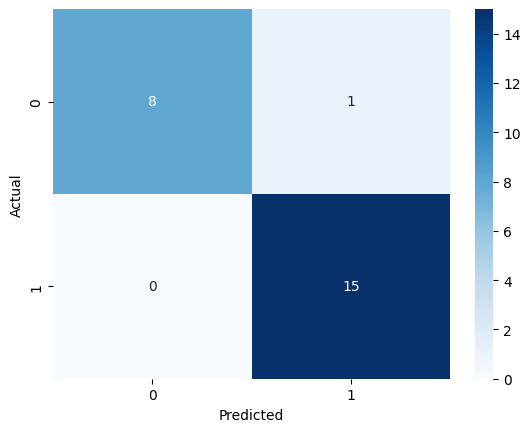

In [97]:
print("Heatmap\n")
m2 = pd.crosstab(test_data2.labels, yp2, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(m2,annot=True, cmap='Blues')

In [98]:
model.save("model7.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
